In [1]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [3]:
# Loading the dataset

tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
# Checking NaN values

tips.isna().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [5]:
# Convert Categories to numbers

tips['sex'] = preprocessing.LabelEncoder().fit_transform(tips['sex'])
tips['smoker'] = preprocessing.LabelEncoder().fit_transform(tips['smoker'])
tips['day'] = preprocessing.LabelEncoder().fit_transform(tips['day'])
tips['time'] = preprocessing.LabelEncoder().fit_transform(tips['time'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### **WITHOUT FEATURE SCALING**

In [6]:
# Test and train split

xtrain, xtest, ytrain, ytest = train_test_split(tips.drop('tip', axis='columns'), tips.tip, test_size=0.3, random_state=16)

In [7]:
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [8]:
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)

Coefficients : [ 9.19557929e-02  7.29360228e-02 -1.38016880e-01 -3.89006751e-02
 -8.31252056e-05  1.36422338e-01]
Intercept : 0.9127152025929841


In [9]:
ypred = pd.Series(model.predict(xtest))

In [10]:
# Loss functions

mse = metrics.mean_squared_error(ytest, ypred)
rmse = metrics.root_mean_squared_error(ytest, ypred)
r2 = metrics.r2_score(ytest, ypred)

print("MSE :",mse)
print("RMSE :",rmse)
print("R2 Score :",r2)

MSE : 0.8431396526184531
RMSE : 0.918226362406598
R2 Score : 0.5706197021627846


### **WITH FEATURE SCALING**

In [11]:
# Train test split & feature scaling

xtrain, xtest, ytrain, ytest = train_test_split(tips.drop('tip', axis='columns'), tips.tip, test_size=0.3, random_state=16)

scaler = preprocessing.StandardScaler()
xtrain_scaled = pd.DataFrame(scaler.fit_transform(xtrain), columns=xtrain.columns)
xtest_scaled = pd.DataFrame(scaler.transform(xtest), columns=xtest.columns)

ytrain_scaled = pd.Series(preprocessing.StandardScaler().fit_transform(ytrain.values.reshape(-1, 1)).flatten())
ytest_scaled = pd.Series(preprocessing.StandardScaler().fit_transform(ytest.values.reshape(-1, 1)).flatten())

xtrain_scaled.describe()

,total_bill,sex,smoker,day,time,size
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,5.224579e-17,5.224579e-17,-6.269495e-17,-7.314411e-17,-3.134747e-17,-2.194323e-16
std,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00
min,-1.879169e+00,-1.389617e+00,-8.164966e-01,-1.831642e+00,-6.546537e-01,-1.617395e+00
25%,-6.770912e-01,-1.389617e+00,-8.164966e-01,-7.725294e-01,-6.546537e-01,-5.914356e-01
50%,-2.688164e-01,7.196229e-01,-8.164966e-01,2.865835e-01,-6.546537e-01,-5.914356e-01
75%,4.141691e-01,7.196229e-01,1.224745e+00,1.345696e+00,1.527525e+00,4.345241e-01
max,3.689700e+00,7.196229e-01,1.224745e+00,1.345696e+00,1.527525e+00,3.512403e+00


In [12]:
model = linear_model.LinearRegression()
model.fit(xtrain_scaled, ytrain_scaled)

LinearRegression()

In [13]:
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)

Coefficients : [ 5.75673262e-01  2.52521096e-02 -4.93763892e-02 -2.68223215e-02
 -2.78178705e-05  9.71039067e-02]
Intercept : 1.1024339240618036e-16


In [14]:
# Loss functions

ypred_scaled = pd.Series(model.predict(xtest_scaled))

mse = metrics.mean_squared_error(ytest_scaled, ypred_scaled)
rmse = metrics.root_mean_squared_error(ytest_scaled, ypred_scaled)
r2 = metrics.r2_score(ytest_scaled, ypred_scaled)

print("MSE :",mse)
print("RMSE :",rmse)
print("R2 Score :",r2)

MSE : 0.4443002334607252
RMSE : 0.6665584996538002
R2 Score : 0.5556997665392749


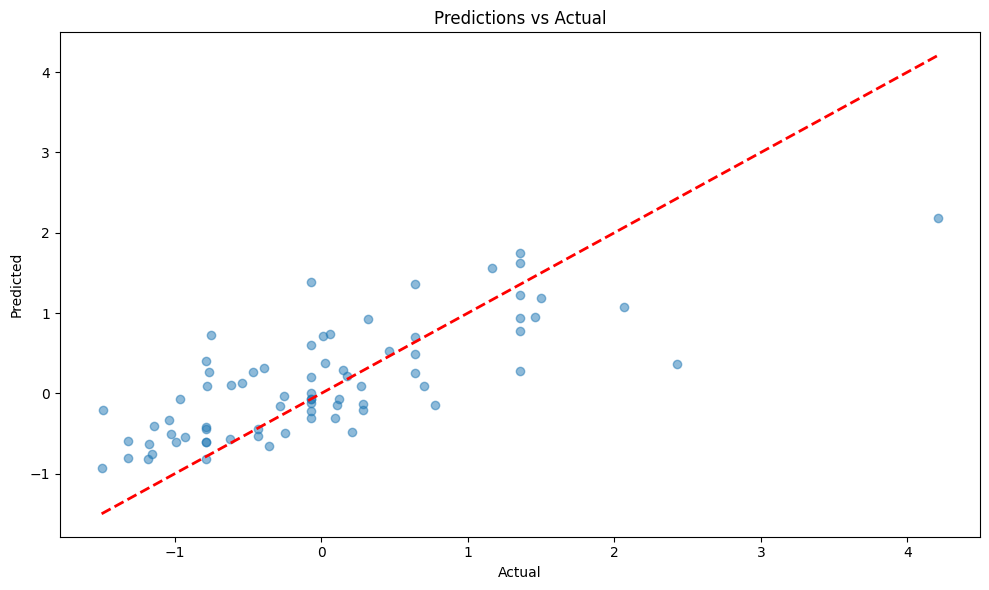

In [17]:
# Plotting predictions vs actual

plt.figure(figsize=(10, 6))
plt.scatter(ytest_scaled, ypred_scaled, alpha=0.5)
plt.plot([ytest_scaled.min(), ytest_scaled.max()], [ytest_scaled.min(), ytest_scaled.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs Actual')

plt.tight_layout()
plt.show()